
# Welcome!

With the anticipation of Monster Hunter Rise, I wanted to take a look at the previous games in the Monster Hunter series. Monster Hunter is a series of video games made by Capcom that you play as a hunter that hunts various different and unique monsters. Large monsters act as "bosses" so the more monsters in a title means the more potential playtime you can have. Each new installment brings new monsters, new ways to hunt the monsters and also brings older monsters from previous games. When a base version of a title is released, it is followed by a sequel (known as a ultimate expansion/version of the base game). Ultimate expansions brings more monsters and therefore more playtime! 

The reason for this notebook is to practice using pandas and data visualization tools (matplotlib) to produce some neat figures for Monster Hunter community to enjoy. 

## I plan on looking into:
### **The amount of monsters that are released in each game**
New monsters are always the most exciting part of a new release of a Monster Hunter title. Seeing the amount of monsters throughout the series would also be interesting! Why not both? I plan on looking at the distribution of the total monsters, as well as new monsters in each title. Maybe we can see if we are getting more monster as the series goes on!

*Background infomation:*
    * Japanese Title: is the japanese release of the title. they were released earlier than their international counterpart until recent.
    * International Title: is the international title for a japanese release, earlier international titles in the series often had different title names to thier japanese counterpart.
    * Large Monsters: Large monsters are considered boss monsters, the goal of the game is to hunt these monsters.
    * Small Monsters: Small monsters are supplimentary monsters to add life to the game.
    * Variant Monsters: Variant monsters are that are altered version of large monsters. they are identified as a variant if they have a prefix on their name (ie: Azure Rathalos is a variant to the Rathalos).
    * New Monsters: Monsters that are introduced in that title.
    
### **Monster types throught the mainline series**
There are many different types of monsters in the series. There are dragons and dinosaurs to mammoths and even large crabs. I want to see what monster types are favored in the series by creating a figure to see the amount of different monster types in the series. 

*Background infomation:*
    * Monster Types: every monster in Monster Hunter has a type (like how animal classification).
    
### **The occurances of each monster throughout the mainline series**
Which monster is the most popular? Popularity wont be judged like it was in highschool rather, which monsters has appeared in the most titles (Hopefully no feeling are hurt). 

*Background infomation:*
    * Monster Types: see above.
### **Time between releases of base and ultimate versions and the increase of monsters in the ultimate versions**
What the worst part about a base titles release? waiting for the ultimate release of course. I will see what the average time between base and ultimate versions and I will also look into how much more monster are added to the 

*Background infomation:*
    * Base Version: is a title that is new the series that brings a new story Monster Hunter.
    * Ultimate Version: a base version that adds onto the story, adds new monsters and a new difficulty.
### **Monsters that each director introduces, do they favor their monsters when releasing a game?**
We all love our children (I would if I had one I think) but do directors of Monster Hunter feel the same towards the monster they have introduced? I was curious if they did, so we will see! 

*Background infomation:*
    * Director: A Director is a person that is in charge of creating a title.

---

## Table of Contents
1. [**Methods**](#Methods)
    * [**Cleaning**](#Cleaning)
    * [**Amount of Monsters: Processing**](#Amount-of-Monsters:-Processing-the-Data)
    * [**Monster Types: Processing**](#Monster-Types:-Processing-the-data)
    * [**Occurance of Monsters: Processing**](#Occurance-of-Monsters:-Processing-the-Data)
    * [**Base vs. Ultimate: Processing**](#Base-vs.-Ultimate:-Processing-the-data)
    * [**Directors of Monster Hunter: Processing**](#Directors-of-Monster-Hunter:-Processing-the-data)
2. [**Analysis**](#Analysis)
    * [**Amount of Monsters: Analysis**](#Amount-of-Monsters:-Analysis)
    * [**Monster Types: Analysis**](#Monster-Types:-Analysis)
    * [**Occurance of Monsters: Analysis**](#Occurance-of-Monsters:-Analysis)
    * [**Base vs. Ultimate: Analysis**](#Base-vs.-Ultimate:-Analysis)
    * [**Directors of Monster Hunter: Analysis**](#Directors-of-Monster-Hunter:-Analysis)

---



# *Methods*

*Note* The explaination of my process is generalized because I do not expect everyone to understand python. I wanted to inform you on the direction I am going through to process the data inorder to analyze it. if you want to just want to see the outcomes of the processing (The Figures!) skip to the [Analysis](#Analysis).

### Cleaning

There are 3 csv files:

1. **Monster Classes** (Describes Monster Type and Size) [Monster_Classes.csv](Monster_Classes.csv)
2. **Title Data** (Describes Title information including release data, director) [MonsterHunter_General_Data.csv](MonsterHunter_General_Data.csv)
3. **Monster in Title** (lists all monsters in a title) [Monsters_in_Games.csv](Monsters_in_Games.csv)

I prepared the .csv files to includes data such as monsters in each games, specific monster data, and title information.

Inorder to join the 3 tables together, a simular key is needed to join the tables. **Monsters in Title** Table is melted to make a 2 column table with columns ['Name','Title'] so it can be join with **Monster Classes** table on *'Name'*. The combined table is join with **Title Data** on *'Title'* to create **Monster Hunter Data** table 

most of the data was collected refering to the website [MonsterHunter.Fandom](https://monsterhunter.fandom.com/wiki/Monster_Hunter_Wiki)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src import clean_data
from src import analysis
from src import figures
from src import helpers

In [2]:
monster_hunter_data = clean_data.get_data()
monster_hunter_data

,Name,Type,Size,Title,Country Released,Date Released,Generation,Director,Console
0,Abyssal Lagiacrus,Leviathan,Large,Monster Hunter 3 Ultimate,North America,2013-03-19,3,Kaname Fujioka,3DS
1,Agnaktor,Leviathan,Large,Monster Hunter 3 Ultimate,North America,2013-03-19,3,Kaname Fujioka,3DS
2,Alatreon,Elder Dragon,Large,Monster Hunter 3 Ultimate,North America,2013-03-19,3,Kaname Fujioka,3DS
3,Altaroth,Neopteron,Small,Monster Hunter 3 Ultimate,North America,2013-03-19,3,Kaname Fujioka,3DS
4,Anteka,Herbivore,Small,Monster Hunter 3 Ultimate,North America,2013-03-19,3,Kaname Fujioka,3DS
...,...,...,...,...,...,...,...,...,...
2496,Vespoid,Neopteron,Small,Monster Hunter Freedom,North America,2006-05-23,1,Yasunori Ichinose,Playstation Portable
2497,White Monoblos,Flying Wyvern,Large,Monster Hunter Freedom,JPN,2005-12-01,1,Yasunori Ichinose,Playstation Portable
2498,White Monoblos,Flying Wyvern,Large,Monster Hunter Freedom,North America,2006-05-23,1,Yasunori Ichinose,Playstation Portable
2499,Yian Kut-Ku,Bird Wyvern,Large,Monster Hunter Freedom,JPN,2005-12-01,1,Yasunori Ichinose,Playstation Portable



### Amount of Monsters: Processing the Data

The analysis will be done on the following titles:

In [3]:
analysis_titles = analysis.get_amt_titles_df()
analysis_titles

,Base,Ultimate
0,Monster Hunter,Monster Hunter Freedom
1,Monster Hunter Freedom 2,Monster Hunter Freedom Unite
2,Monster Hunter 3,Monster Hunter 3 Ultimate
3,Monster Hunter Portable 3rd,NaN
4,Monster Hunter 4,Monster Hunter 4 Ultimate
5,Monster Hunter Generations,Monster Hunter Generations Ultimate
6,Monster Hunter: World,Monster Hunter World: Iceborne
7,Monster Hunter Rise,NaN


**Note:** Early in the series, the japanese titles would be released months before the international release, the international releases would also have the title name changed (ex: (Jpn) Monster Hunter X, (International) Monster Hunter Generations )

**Note** I am using the monsters from *Monster Hunter: World* and *Monster Hunter World: Iceborne* last updates and Version 3.0 of *Monster Hunter Rise*


I am focusing on the international named titles, if it has one, otherwise I will be looking at the japanese named title

for each title I obtain:
1. Amount of total monsters
2. Amount of large monsters
3. Amount of small monsters
4. Amount of new monsters
5. Amount of new large monsters
6. Amount of new small monsters
7. Amount of Variant/Subspecies/Deviants


For all the titles:

```python
title_data = monster_hunter_data[monster_hunter_data['Title'] == title]
```

To find [ 1 ]  I filtered for the title name, removed any duplicate monster names, and counted the rows

```python
title_monsters = title_data.drop_duplicates(subset=['Name']).count()
```

Similary to [ 1 ] to find [ 2 / 3 ] I filter by title name, duplicate monster names and groupby the  each size and count the rows

```python
large_monsters = total_monsters.groupby('Size').count().Large
small_monsters = total_monsters.groupby('Size').count().Small
```

In order to find [ 4 ], new monsters in the title needs to be found, the title date is used to filter for previous titles. The minimum title date is taken as filter condition.

```python
title_date = min(title_data['Date Released'])
```

a list of monsters from the title and a list of monsters from all previous titles are found. the new monsters are found by taking the set difference of the previous monsters and the title monsters (Removing any previous monsters from the title monster list).

```python
previous_monsters = title_data[title_data['Date Released'] < title_date].drop_duplicates(subset=['Name'])
```

```python
new_monsters = title_monsters[title_monsters['Name'].isin(previous_monsters) == False].count()
```

The [ 5 / 6 ] is just a groupby on 'Size' using the data from [ 4 ].

```python
new_large_monsters = new_monsters.groupby('Size').count().Large 
new_small_monsters = new_monsters.groupby('Size').count().Small

```

[ 7 ] The variants (which are generalization of subspecies/deviants/apex(Rise)) are retrieved finding the non-variant monsters by sorting a list of all the monsters names by string length (ascending order) and then iterating through the list from 0 to n-1 removing any names that contains the shorter names which produces a list of non-variant monsters. to get the variants we takes the difference of titles monsters and the non-variant title monsters.

```python
variant_count = monsters_in_title[monsters_in_title['Size'] == 'Large']['Name'].count() - len(
            helpers.filter_out_variants(monsters_in_title[monsters_in_title['Size'] == 'Large']))
```

see the [filter_out_variants(df)](helpers.py) if interested

In [4]:
amt_monsters_df = analysis.get_amt_table(analysis_titles,monster_hunter_data)


---

### Monster Types: Processing the data

To get the monsters throughout the titles, duplicate monster names are dropped from ```monster_hunter_data``` and a counting the rows of each type.

```python
monster_type_data = monster_hunter_data.drop_duplicates(subset=['Name']).groupby('Type').count()
```

to find out when each type was introduced, I sort the date released by ascending order and drop duplicate released date (keeping the first date) to make ```monster_type_intro_date```.
```python
monster_type_intro_date = monster_hunter_data.sort_values(by='Date Released').drop_duplicates(
                                                                               subset=['Type'],keep='first')
```

---

In [5]:
monster_type_data,monster_type_intro_date = analysis.get_types_df(monster_hunter_data)


---

### Occurance of Monsters: Processing the Data

I will be using ```analysis_titles``` to make:
```python
monster_occurance_data = monster_hunter_data[monster_hunter_data['Title'].isin(analysis_titles) == True]
```
a list of occurances of each monster and their type is produced
```python
monster_occurance_data = monster_occurance_data.groupby(['Name', 'Type'])['Title'].count()
```
```monster_occurance_data``` has 3 columns 'Name', 'Type','Occurance', where occurance is the amount of times it is in the analysis titles. To find the monster and types that has been in most titles, I get the max occurances by grouping by 'Type' and using the max aggregate.
```python
max_occ_monster_type = monster_occurance_data.groupby('Type')['Title'].max()
```
joining ```max_occ_monster_type``` and ```monster_occurance_data``` on 'Type' to produce ```most_occurances```. The join adds the column 'Max Occurance' that contains the highest number of occurances of the given type of monster. To create the final table I filter the table where occurance is equal to the max occurance of the monster type.
```python
most_occurances = most_occurances[most_occurances['Occurance'] == most_occurances['Max_Occurance']]
```

In [6]:
most_occurances = analysis.get_monster_occurance_df(analysis_titles,monster_hunter_data)


---

### Base vs. Ultimate: Processing the data

for the analysis, I want to see how much time does it take between the base and ultimate versions and how much more monsters are added to the ultimate release.

I choose to use the japanese titles release dates because they have the earliest release dates.

In [7]:
game_titles = analysis.get_base_ultimate_titles()
game_titles

,Base,Ultimate
0,Monster Hunter,Monster Hunter G
1,Monster Hunter Portable 2nd,Monster Hunter Portable 2nd G
2,Monster Hunter 3,Monster Hunter 3 G
3,Monster Hunter 4,Monster Hunter 4 G
4,Monster Hunter X,Monster Hunter XX
5,Monster Hunter: World,Monster Hunter World: Iceborne


**note**: Monster Hunter:Portable 3g and Monster Hunter:Rise are excluded because they do not have ultimate releases

The ```game_title_data``` table is made by filtering for ```game_titles```, titles are sorted by 'Release date' and any duplicate titles are dropped.

2 more tables are created by joining the respective column from ```game_titles``` to ```game_title_data``` to create ```base_titles``` and ```ultimate_titles```
```python
base_titles = pd.merge(game_title_data, game_titles, left_on='Title', right_on="Base", how='right').dropna()[
        ['Title', 'Date Released']]
```
```python
ultimate_titles = pd.merge(game_title_data, game_titles, left_on='Title', right_on="Ultimate", how='right').dropna()[
        ['Title', 'Date Released']]
```
a 'Large Monster' column is added to both ```base_titles``` and ```ultimate_titles``` by applying a function to get the large monster in the titles
```python
lambda title: len( mh_data[mh_data['Title'] == title) & (mh_data['Size'] == 'Large')]['Name'].unique() )
```
The tables ```base_titles```, ```ultimate_titles``` are joined on index that relates base game to ultimate version to create ```bu_game_date_data```. The columns 'Date Difference' and 'Large Monster Difference' are added by computing the difference of the ultimate date and large monsters by base date and large monsters
```python
bu_game_date_data['Date Difference'] = abs(bu_game_date_data['Date Released Ultimate'] - 
                                        bu_game_date_data['Date Released Base'])
```
```python
bu_game_date_data['Monster Difference'] = abs(bu_game_date_data['Large Monsters Ultimate'] - 
                                           bu_game_date_data['Large Monsters Base'])
```

In [8]:
bu_game_date_data = analysis.get_base_ultimate_df(game_titles, monster_hunter_data)


### Directors of Monster Hunter: Processing the data

Inorder to find each directors monsters I sorted ```monster_hunter_data``` by 'Date Released' and dropped and duplicate monster names (keeping the first occurance) creating ```director_data```. 
```python
director_data = monster_hunter_data.sort_values(by=['Date Released']).drop_duplicates(subset=['Name'], keep='first')
```
Filtering for each director, **Kaname Fujioka**, **Yasunori Ichinose**, and **Yuya Tokuda**.
```python
fujioka_titles = director_data[director_data['Director'] == 'Kaname Fujioka'][
        ['Title', 'Date Released', 'Director']].drop_duplicates(subset=['Title'],keep='first')
```
I create a list of the directors monsters by using ```director_data``` and filtering for the director and projecting ['Name','Title']
```python
fujioka_monsters = director_data[director_data['Director'] == 'Kaname Fujioka'][['Name', 'Title']]
```
I add 2 additional columns to ```fujioka_titles```, ['Total Monsters','Director Monsters'] by apply 2 functions to the dataframe
```python
# For Total Monsters
lambda title: monster_hunter_data[monster_hunter_data['Title'] == title]['Name'].drop_duplicates().count())

# For Director Monsters
lambda title: monster_hunter_data[(monster_hunter_data['Title'] == title) &
 (monster_hunter_data['Name'].isin(fujioka_monsters['Name']) == True)]['Name'].drop_duplicates().count())
```

I combine the ```fujioka_titles```, ```ichinose_titles```, ```tokuda_titles``` to create ```director_title_data``` and an additional dataframe to made to that has columns ['Director','Titles','Total Director Monsters'].

---

In [9]:
director_title_data,director_data = analysis.get_director_df(monster_hunter_data)


---

# *Analysis*

## Amount of Monsters: Analysis

using ```amt_monsters_df``` produces 'Amount of Monster in Mainline Series' figure.

In [10]:
amt_monsters_df

,index,Title,Release Date,Total Monsters,Large Monsters,Small Monsters,New Monsters,New Large Monsters,New Small Monsters,Variant Monsters,New Monster Ratio,Variant Monster Ratio
0,0,Monster Hunter,2004-03-11,30,17,13,30,17,13,0,1,0
1,0,Monster Hunter Freedom,2005-12-01,44,31,13,14,14,0,13,0.451613,0.419355
2,0,Monster Hunter Freedom 2,2007-08-28,70,47,23,27,17,10,15,0.361702,0.319149
3,0,Monster Hunter Freedom Unite,2009-06-22,81,58,23,11,11,0,20,0.189655,0.344828
4,0,Monster Hunter 3,2009-08-01,35,19,16,26,16,10,0,0.842105,0
5,0,Monster Hunter Portable 3rd,2010-12-01,60,41,19,20,17,3,11,0.414634,0.268293
6,0,Monster Hunter 3 Ultimate,2013-03-19,73,52,21,11,10,1,21,0.192308,0.403846
7,0,Monster Hunter 4,2013-09-14,72,53,19,16,14,2,18,0.264151,0.339623
8,0,Monster Hunter 4 Ultimate,2015-02-13,98,76,22,12,12,0,33,0.157895,0.434211
9,0,Monster Hunter Generations,2016-07-15,105,72,33,22,19,3,16,0.263889,0.222222


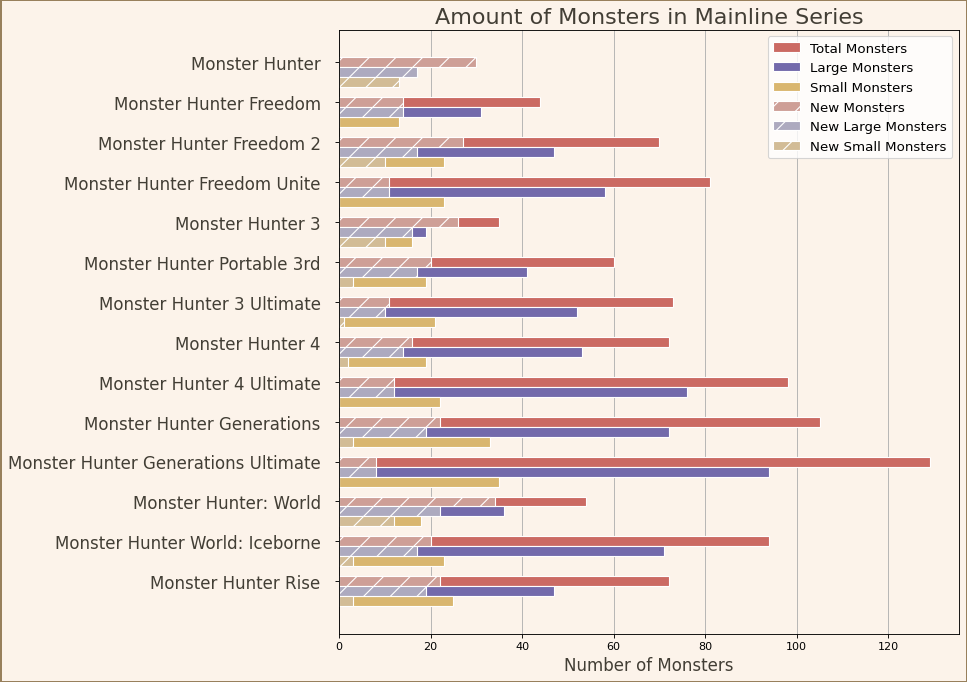

In [11]:
figures.make_amt_monsters_figure(amt_monsters_df)

Some outlier titles when it comes to new monsters are *Monster Hunter*, *Monster Hunter Generations Ultimate*, and *Monster Hunter 3*

*Monster Hunter* is the first title in the series so the 1.0 new monster ratio is not alarming.

*Monster Hunter Generations Ultimate* is a anniversary and the Monster Hunter team goal was to bring as much previous monsters in the franchise, so the low new monster ratio is valid.

*Monster Hunter 3* has a high new monster ratio at 0.84 which is interesting. this title is the only base title with underwater combat. maybe since there was such a new and unique way to play this title they wanted to add many new monsters.

Overall I think do not think you can answer any questions such as *Are they adding less monster over time?* because the way each title gets made most likely differs in amount of time for development to what monsters would fit the theme of the title. 

In [12]:
analysis.print_avg_amt_monsters(amt_monsters_df)

Mean of New Monster Ratio 0.39128 
Median of New Monster Ratio: 0.31293

Mean of Variant Monster Ratio: 0.25573
Median of Variant Monster Ratio: 0.29372



---

## Monster Types: Analysis


In [13]:
monster_type_intro_date

,Type,Title,Date Released
0,Flying Wyvern,Monster Hunter,2004-03-11
1,Neopteron,Monster Hunter,2004-03-11
2,Bird Wyvern,Monster Hunter,2004-03-11
3,Lynian,Monster Hunter,2004-03-11
4,Piscine Wyvern,Monster Hunter,2004-03-11
5,Herbivore,Monster Hunter,2004-03-11
6,Elder Dragon,Monster Hunter,2004-03-11
7,Fanged Beast,Monster Hunter,2004-03-11
8,Snake Wyvern,Monster Hunter 2,2006-02-16
9,Carapaceon,Monster Hunter 2,2006-02-16


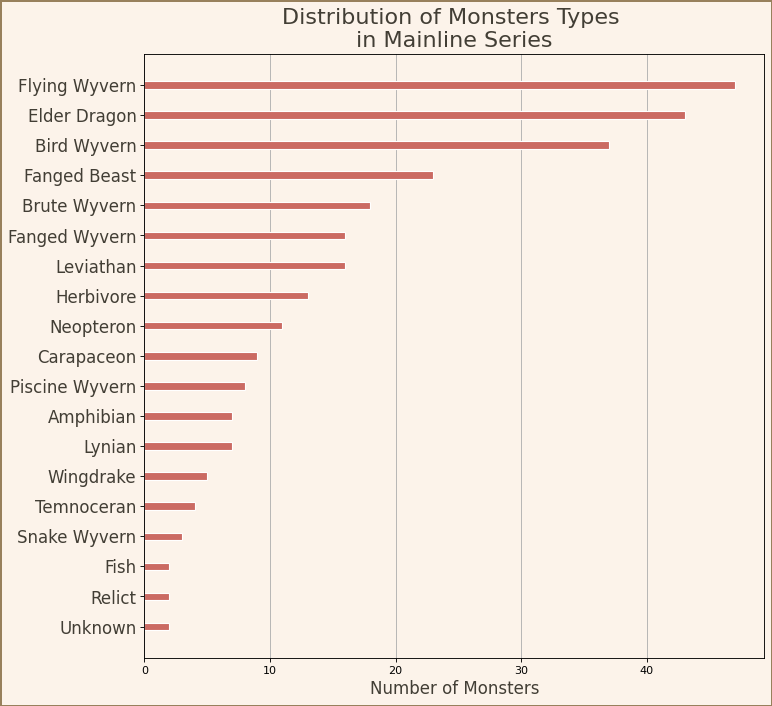

In [14]:
figures.make_type_figure(monster_type_data)

Monster Types that are the most popular are *Flying Wyvern (47)*, *Elder Dragon (43)* and *Bird Wyvern (37)*. 

The monster types in the top half are monster types that were release in the frist title *Monster Hunter*  with the exception of *Neopteron (11)*, *Lynian (7)* and *Herbivore (13)*. *Lynian* and *Herbivore* are small monsters that are included in each title to add life and are usually reintroduced therefore the amount is fair. *Neopteron* are also small monsters but they do include some large monsters (Seltas, Seltas Queen, etc.).

The monster type *Snake Wyvern (3)*  has a low amount of monsters that belong to its type. 

In [15]:
analysis.get_snake_wyverns(monster_hunter_data)

,Name,Type,Size,Title
2262,Remobra,Snake Wyvern,Small,Monster Hunter 2
1442,Najarala,Snake Wyvern,Large,Monster Hunter 4
1557,Tidal Najarala,Snake Wyvern,Large,Monster Hunter 4 G


This means that the last time a new *Snake Wyvern* was released was at the end of 2014!
This got me curious, so I looked for what are the monster type(s) have the longest time since a monster of that type has been released.

In [16]:
analysis.get_last_seen_types(monster_hunter_data)

,Name,Type,Title
1557,Tidal Najarala,Snake Wyvern,Monster Hunter 4 G
1489,Chaotic Gore Magala,Unknown,Monster Hunter 4 G


*Snake Wyvern* and the *Unknown* types both have not had new monsters since the end of 2014! 

---

## Occurance of Monsters: Analysis

In [17]:
most_occurances

,Name,Type,Occurance
0,Kelbi,Herbivore,14
1,Rathalos,Flying Wyvern,14
2,Rathian,Flying Wyvern,14
3,Felyne,Lynian,12
4,Melynx,Lynian,12
5,Kirin,Elder Dragon,10
6,Bullfango,Fanged Beast,9
7,Deviljho,Brute Wyvern,9
8,Altaroth,Neopteron,8
9,Bnahabra,Neopteron,8


The monsters with the most occurances throughout the series is **Rathalos**, **Rathian** and **Kelbi** which have shown up in all analysis titles. 

Rathalos  | Rathian | Kelbi |
:-------------------------:|:----------------------:|:----------------------:
![Rathalo](Resources/MHRise-Rathalos_Render_003.png) | ![Rathian](Resources/MHRise-Rathian_Render_002.png) | ![Kelbi](Resources/MHW-Kelbi_Render_002.png)

*Images from MonsterHunter.fandom*

The *Kelbi* being in every game is necessary because there is a helpful item that you use in the game that uses material that come it. 

It is interesting that both the *Rathian* and *Rathalos* are the most occuring large monster. They are the male and female counterpart to each other. If one in featured in a title, the other one will surely be appreaing in that title too! I suppose you can say that both the *Rathian* and *Rathalos* are Monster Hunter's iconic monsters. They are dragons, what's not to like about them!


---

# Base vs. Ultimate: Analysis


In [18]:
bu_game_date_data

,Title Base,Date Released Base,Large Monsters Base,Variant Monsters Base,Title Ultimate,Date Released Ultimate,Large Monsters Ultimate,Variant Monsters Ultimate,Date Difference,Monster Difference,Variant Monster Difference
0,Monster Hunter,2004-03-11,17,0,Monster Hunter G,2005-01-20,28,9,315 days,11,9
1,Monster Hunter Portable 2nd,2007-02-22,47,15,Monster Hunter Portable 2nd G,2008-03-27,58,20,399 days,11,5
2,Monster Hunter 3,2009-08-01,19,0,Monster Hunter 3 G,2011-12-10,52,21,861 days,33,21
3,Monster Hunter 4,2013-09-14,53,18,Monster Hunter 4 G,2014-10-11,76,33,392 days,23,15
4,Monster Hunter X,2015-11-28,72,16,Monster Hunter XX,2017-03-18,94,25,476 days,22,9
5,Monster Hunter: World,2018-01-26,36,4,Monster Hunter World: Iceborne,2019-09-06,71,23,588 days,35,19


In [19]:
analysis.get_time_between_bas_ultimate(bu_game_date_data)

Mean of time between games 16.55738 months
Median of time between games 14.32787 months


Lets use the mean time between games because with Covid, the time of game devolpment has been effected for many game studios. Monster Hunter Rise released on March 26/2021 so maybe Monster Hunter Rise Ultimate will be released on mid July 2022 (sooner I hope!)

I also would like to see how much more monsters and variant monsters are added to the ultimate releases throughout the series.

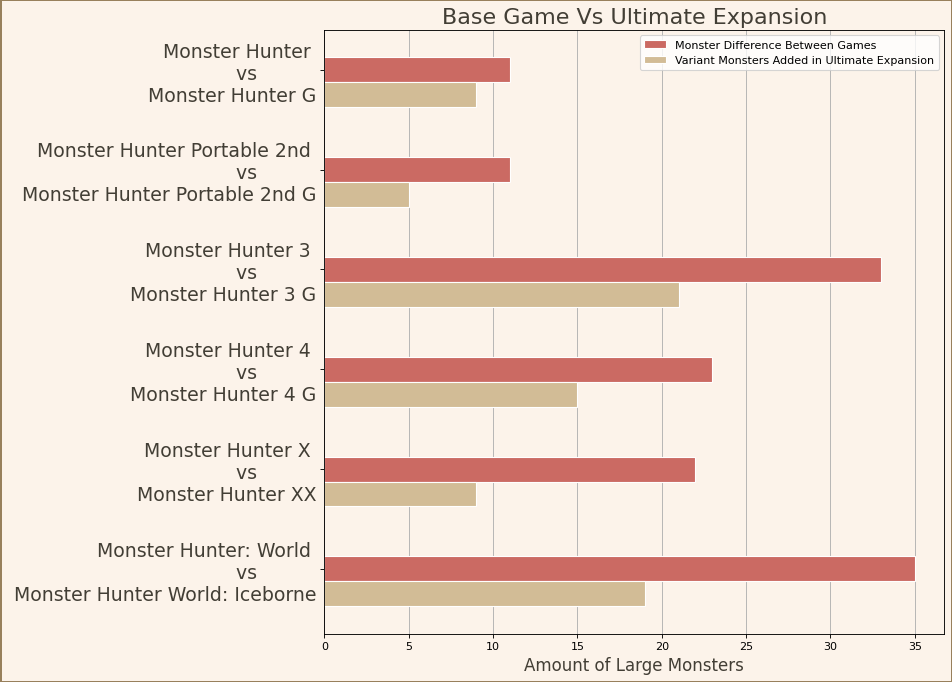

In [20]:
figures.make_base_ultimate_figure(bu_game_date_data)

*Note* I am using the japanese titles because they are released before their international counterparts

The amount of large monsters added has changed from after *Monster Hunter Portable 2nd*. I think this is hard to answer the question "are there more monsters being added to ultimate releases" because as time goes on, the budget and popularity of the series increases and makes adding more monsters possible. Starting with *Monster Hunter: World* they have been slowly adding more monster through constant updates made possible with access to the internet. Monster Hunter games in the past have always been released and never new monsters being added.    


---

##  Directors of Monster Hunter: Analysis

Lets see if the directors of Monster Hunter, *Kaname Fujioka*, *Yasunori Ichinose*, and the newest director *Yuya Tokuda* favor monsters they have introduced.

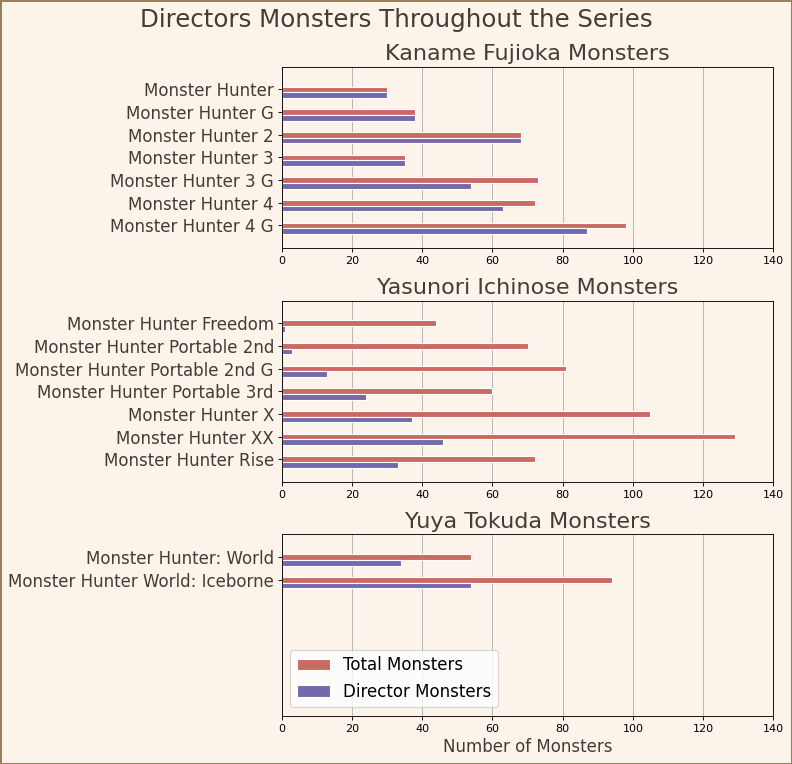

In [21]:
figures.make_director_figure(director_title_data)

In [22]:
director_data

,Director,Titles,Total Director Monsters
0,Kaname Fujioka,7,133
1,Yasunori Ichinose,7,86
2,Yuya Tokuda,2,54


it is not possible to see if *Yuya Tokuda* favors his own monsters because he has only director 2 titles, a base and ultimate release. Both *Kaname Fujioka* and *Yasunori Ichinose* have 7 title each to compare.

To see the differnce between *Kaname Fujioka* and *Yasunori Ichinose* we can take the mean of each 'Director Monster Ratio'.

In [23]:
analysis.get_director_mean_monster_ratio(director_title_data)

,Director,Mean
0,Kaname Fujioka,0.928926
1,Yasunori Ichinose,0.256197
2,Yuya Tokuda,0.602049


*Kaname Fujioka* seems to favor his own monsters compared to *Yasunori Ichinose*. But *Kaname Fujioka* did work on 2 titles, *Monster Hunter* and *Monster Hunter G* before *Yasunori Ichinose*. as we found out in the **Occurance of Monsters: Analysis** the most occuring monsters come from the first title *Monster Hunter* that was directed by *Kaname Fujioka*. By comparing the ```most_occurances``` list to the monsters introduced by *Kaname Fujioka*.

In [24]:
monsters_in_most_occ, total_monsters_in_most_occ = analysis.fujioka_occ_comparison(most_occurances, monster_hunter_data)
monsters_in_most_occ / total_monsters_in_most_occ

0.8095238095238095

In the ```most_occurances``` list, monsters that *Kaname Fujioka* have introduced populated about ~81% of that list! if we take a look at the amount of monsters each director has introduced:


---

# Conclusion

I do not think I have discovered any meaniful information about Monster Hunter but I do believe I have found some nice little details such as director monsters and occuring Types of monsters. made some nice figures that I hope the Monster Hunter community will enjoy. I feel much more comforatable with using pandas and I do feel there is much more I can do with them. 

A big thanks to the community that runs [MonsterHunter.Fandom](https://monsterhunter.fandom.com/wiki/Monster_Hunter_Wiki), It made this project much easier to collect the data

Thank you so much for taking the time to read this, I am still trying to find a writing style that suites me. I plan on keep on practicing skill that will help me in the future and sharing interesting and fun topics with many communities! 